# importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os


In [2]:
os.chdir('/Users/Harsha/Desktop/')
print(os.getcwd())

/Users/Harsha/Desktop


# Importing dataset

In [3]:
data= pd.read_csv('hours.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# visualizing Data

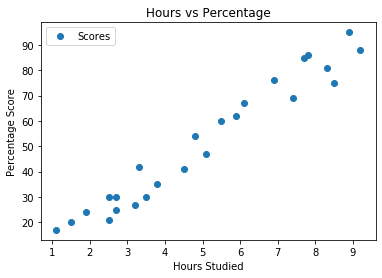

In [5]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

###### OBSERVATION: we can clearly observe that as the number of hours are increasing the percentage score is also increasing.
###### CONCLUSION: Both are positively correlated

##### Dataset for training :  x= Dependent variable , y= independent variable 

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  


###### checking the dataset and lengths 

In [7]:
X= X.reshape(-1, 1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
y= y.reshape(-1, 1)
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [9]:
print("length of X:" ,len(X))
print("length of y:" ,len(y))

length of X: 25
length of y: 25


##### since we have 25 values each we can use 20 for trainning and 5 for testing 

In [10]:
test_size = 5/25

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=0) 
print("split done")

split done


##### Testing the split

In [12]:
print("length of X_train:" ,len(X_train))
print("length of X_test:" ,len(X_test))

length of X_train: 20
length of X_test: 5


##### Building logistic Regression model 

In [13]:
from sklearn.linear_model import LinearRegression  
linear = LinearRegression()  
linear.fit(X_train, y_train) 

print("logistic regression model built.")

logistic regression model built.


##### Predicting the scores

In [14]:

y_pred = linear.predict(X_test)

##### checking your model outputs

In [15]:
print("Hours", "Scores", "pred_Scores")
for i in range(len(X_test)):
    print(X_test[i],y_test[i],y_pred[i])

Hours Scores pred_Scores
[1.5] [20] [16.88414476]
[3.2] [27] [33.73226078]
[7.4] [69] [75.357018]
[2.5] [30] [26.79480124]
[5.9] [62] [60.49103328]


##### checking MAE   (Better to check MAE than accuracy as we are dealing with very less data)

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


##### predicting percentage for 9.25 hours 

In [17]:
hours = 9.25

model_pred = linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(model_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


In [18]:
linear.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

##### applying Random forest and Gradient boosting

In [19]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [20]:
GBoost = GradientBoostingRegressor()

###### fitting Gradient Boost

In [21]:
GBoost.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

##### predicting for gradient Boost model

In [22]:
y_pred1 = GBoost.predict(X_test)

##### summarizing

In [23]:
print("Hours", "Scores", "pred_Scores")
for i in range(len(X_test)):
    print(X_test[i],y_test[i],y_pred1[i])

Hours Scores pred_Scores
[1.5] [20] 17.07191660647004
[3.2] [27] 41.820113735352834
[7.4] [69] 84.98590925291927
[2.5] [30] 21.207107461213862
[5.9] [62] 67.00659744798398


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1)) 

Mean Absolute Error: 9.506719273714435


In [25]:
rf = RandomForestRegressor()

##### Fitting Random forest model

In [26]:
rf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##### predicting for random forest

In [27]:
y_pred2 = rf.predict(X_test)


In [28]:
print("Hours", "Scores", "pred_Scores")
for i in range(len(X_test)):
    print(X_test[i],y_test[i],y_pred2[i])

Hours Scores pred_Scores
[1.5] [20] 19.090833333333332
[3.2] [27] 37.77083333333333
[7.4] [69] 84.43
[2.5] [30] 23.380833333333335
[5.9] [62] 63.71


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2)) 

Mean Absolute Error: 7.087833333333334


##### random forest with hyper parameter tuning 

##### change the cell type to "code" to run

best params.

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

best_random = rf_random.best_estimator_


y_pred3 = best_random.predict(X_test)

y_pred3

y_pred3 values : array([28.40875893, 30.7529375 , 27.89338393, 63.35      , 19.8230625 ])

In [30]:
y_pred3 = [28.40875893, 30.7529375 , 27.89338393, 63.35      , 19.8230625 ]

In [31]:
print("Hours", "Scores", "pred_Scores")
for i in range(len(X_test)):
    print(X_test[i],y_test[i],y_pred3[i])

Hours Scores pred_Scores
[1.5] [20] 28.40875893
[3.2] [27] 30.7529375
[7.4] [69] 27.89338393
[2.5] [30] 63.35
[5.9] [62] 19.8230625


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3)) 

Mean Absolute Error: 25.759050000000002


In [33]:
print('Mean Absolute Error for logistic regression:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Absolute Error for Gradient boosting:', metrics.mean_absolute_error(y_test, y_pred1)) 
print('Mean Absolute Error for Random Forest:', metrics.mean_absolute_error(y_test, y_pred2)) 
print('Mean Absolute Error for Random forest with tuning:', metrics.mean_absolute_error(y_test, y_pred3)) 

Mean Absolute Error for logistic regression: 4.183859899002975
Mean Absolute Error for Gradient boosting: 9.506719273714435
Mean Absolute Error for Random Forest: 7.087833333333334
Mean Absolute Error for Random forest with tuning: 25.759050000000002


##### conclusion: logistic Regression is best (high end models may not be the best models all the time)

### using Lazy Regressor to see performance of other models

In [34]:
from lazypredict.Supervised import LazyRegressor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You c

In [35]:
all = LazyRegressor(ignore_warnings= True)

In [36]:
model,preds = all.fit(X_train, X_test, y_train, y_test)

100%|██████████| 39/39 [00:00<00:00, 56.66it/s]

[23:03:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [37]:
model

,R-Squared,RMSE,Time Taken
Model,,,
Ridge,0.95,4.39,0.01
Lasso,0.95,4.41,0.01
ElasticNetCV,0.95,4.48,0.05
LassoCV,0.95,4.51,0.06
SGDRegressor,0.95,4.59,0.01
RidgeCV,0.95,4.61,0.01
BayesianRidge,0.95,4.63,0.01
LassoLarsIC,0.95,4.65,0.01
LarsCV,0.95,4.65,0.01


### output of Best model (Logistic Regression)

In [38]:
hours = 9.25

model_pred = linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(model_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


##### output of other models

In [39]:
hours = 9.25

model_pred1 = GBoost.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score of GBoost = {}".format(model_pred1[0]))

No of Hours = 9.25
Predicted Score of GBoost = 88.06564088936018


In [40]:
hours = 9.25

model_pred2 = rf.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score of Random Forest = {}".format(model_pred2[0]))

No of Hours = 9.25
Predicted Score of Random Forest = 88.72
